In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# import tensorflow as tf
# import tensorflow_hub as hub
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import plotly.express as px

## Process listing Datasets

In [2]:
airbnb_listing= pd.read_csv("../data_set/analysisData.csv.zip")
airbnb_listing.head(10)

/Users/dejavu/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                            listing_url       scrape_id  \
0  20091785  https://www.airbnb.com/rooms/20091785  20180303203649   
1   3710661   https://www.airbnb.com/rooms/3710661  20180303203649   
2  15055244  https://www.airbnb.com/rooms/15055244  20180303203649   
3  19640913  https://www.airbnb.com/rooms/19640913  20180303203649   
4  11888948  https://www.airbnb.com/rooms/11888948  20180303203649   
5  11769831  https://www.airbnb.com/rooms/11769831  20180303203649   
6   7803475   https://www.airbnb.com/rooms/7803475  20180303203649   
7  13935360  https://www.airbnb.com/rooms/13935360  20180303203649   
8  17045788  https://www.airbnb.com/rooms/17045788  20180303203649   
9  21274450  https://www.airbnb.com/rooms/21274450  20180303203649   

  last_scraped                                              name  \
0   2018-03-05     Cozy Stay in Queens, Easy Access to Manhattan   
1   2018-03-04                 Spacious room in comfortable apt.   
2   2018-03-04    Fresh Clean & Modern: Williamsburg at its Best   
3   2018-03-05                    Cozy Room In Perfect Location!   
4   2018-03-05                      Charming Central Park Studio   
5   2018-03-05                     Large 1-bdrm in Crown Heights   
6   2018-03-05                Large 2 Bdrm in prime UWS location   
7   2018-03-04      Bright & Sunny 2-Bedroom in Hamilton Heights   
8   2018-03-04  Cute RM in Private Home with Backyard/Near Metro   
9   2018-03-05                              Colorful SoHo Studio   

                                             summary  \
0  A perfect spot for an intern, student or out o...   
1  Nice size apt  15 minutes from central park, a...   
2  **This listing would normally be $160 per nigh...   
3  This is cozy room near all major transportatio...   
4  Charming, elegant studio located 1/2 block fro...   
5  Hello, travelers! Welcome to my beautiful and ...   
6  Large two bdrm ideal for family in a great loc...   
7  Bright and sunny, renovated 2 bedroom apartmen...   
8  Welcome to the Ciprian family Airbnb! A real h...   
9  My home is a loving, creative & light drenched...   

                                               space  \
0                                                NaN   
1  This is a private room in a two bedroom apartm...   
2  Construction on this mid-sized building was co...   
3                                                NaN   
4  Very charming, clean studio in the most expens...   
5  The apartment is in a very residential neighbo...   
6  Large apartment in New York City that was rece...   
7                                                NaN   
8  Our home is fully renovated with beautiful har...   
9  My apartment is a quirky little space. I keep ...   

                                         description experiences_offered  \
0  A perfect spot for an intern, student or out o...                none   
1  Nice size apt  15 minutes from central park, a...                none   
2  **This listing would normally be $160 per nigh...                none   
3  This is cozy room near all major transportatio...                none   
4  Charming, elegant studio located 1/2 block fro...                none   
5  Hello, travelers! Welcome to my beautiful and ...                none   
6  Large two bdrm ideal for family in a great loc...                none   
7  Bright and sunny, renovated 2 bedroom apartmen...                none   
8  Welcome to the Ciprian family Airbnb! A real h...                none   
9  My home is a loving, creative & light drenched...                none   

                               neighborhood_overview  ... requires_license  \
0  We're right next to the best Indian food in Qu...  ...                f   
1  The apartment is conveniently located on the b...  ...                f   
2  Williamsburg is bursting with culture. Come se...  ...                f   
3                                                NaN  ...                f   
4                           

### Drop columns that missing rate is greater than 50% and fillna(mean) for missing rate greater than 30%

In [4]:
miss_listings = airbnb_listing.isnull().sum() / len(airbnb_listing)

miss_gr_05 = airbnb_listing.columns[miss_listings > 0.5]
print([col + ' ' + str(miss_listings[col]) for col in miss_gr_05])
airbnb_listing = airbnb_listing.drop(miss_gr_05, axis=1)
miss_gr_03 = airbnb_listing.columns[miss_listings > 0.2]
miss_vals_03 = miss_listings > 0.3;
print([col + ' ' + str(miss_listings[col]) for col in miss_gr_03])


airbnb_listing['host_response_rate'] = airbnb_listing['host_response_rate'].apply(lambda col: float(str(col).replace("%", "")))
airbnb_listing['host_response_rate'] = airbnb_listing['host_response_rate'].fillna(np.mean(airbnb_listing['host_response_rate']))
airbnb_listing['security_deposit'] = airbnb_listing['security_deposit'].fillna(np.mean(airbnb_listing['security_deposit']))
airbnb_listing['host_response_time'] = airbnb_listing['host_response_time'].fillna('not provided')

airbnb_listing = airbnb_listing.drop('neighborhood_overview', axis=1)
airbnb_listing = airbnb_listing.drop('access', axis=1)
airbnb_listing = airbnb_listing.drop('transit', axis=1)
airbnb_listing = airbnb_listing.drop('interaction', axis=1)
airbnb_listing = airbnb_listing.drop('host_about', axis=1)
airbnb_listing = airbnb_listing.drop('house_rules', axis=1)
airbnb_listing = airbnb_listing.drop('space', axis=1)

[]
['space 0.2500857868368678', 'neighborhood_overview 0.34451993686088805', 'transit 0.30838652117219134', 'access 0.3510740511975842', 'interaction 0.37053050579919017', 'house_rules 0.3402305950175005', 'host_about 0.34194633175485556', 'host_response_time 0.2745178779768032', 'host_response_rate 0.2745178779768032', 'security_deposit 0.4058403678539565']


In [5]:
airbnb_listing = airbnb_listing.drop(["listing_url","scrape_id","picture_url","host_url"],axis=1)

### Draw price distribution

<AxesSubplot:xlabel='price', ylabel='Count'>

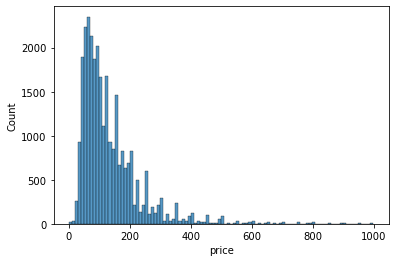

In [6]:
sns.histplot(airbnb_listing['price'],bins = 100)

<AxesSubplot:xlabel='room_type', ylabel='price'>

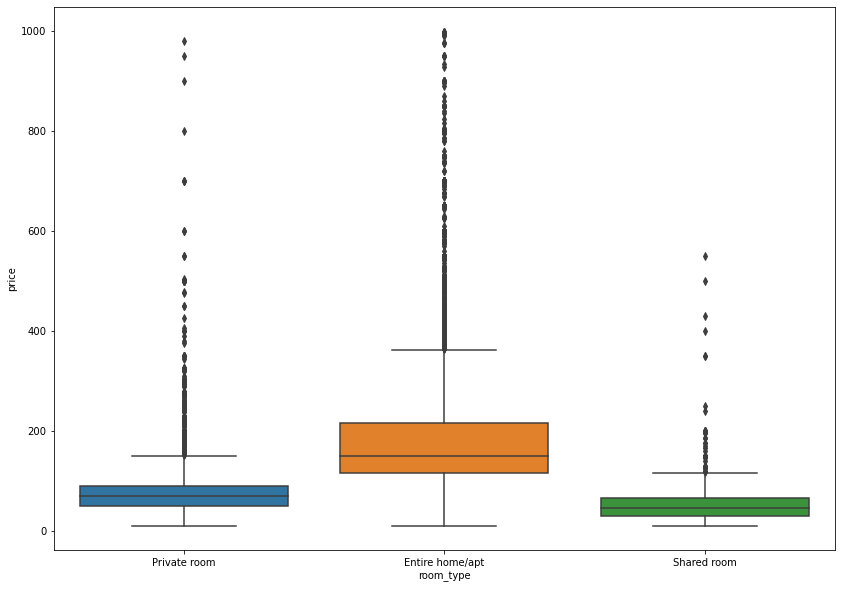

In [7]:
f,ax = plt.subplots(figsize=(14,10))
sns.boxplot(y='price',x='room_type',data=airbnb_listing.loc[(airbnb_listing['price']<=1000) & (airbnb_listing['price']>0)])

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='latitude', y='longitude', data=draw_data, alpha=0.02)

ax.set_title('What Coordinate System are xcoord and ycoord?')
ax.set_ylabel('longitude')
ax.set_xlabel('latitude')
ax.tick_params(axis='x', rotation=0)

NameError: name 'draw_data' is not defined

<Figure size 864x576 with 0 Axes>

In [9]:
def create_map(city):
    price_view = lambda x: 'price: ' + str(round(x, 2))

    if city in {'NYC'}:
        fraction = 0.2
    else:
        fraction = 0.6
        
    df_temp = airbnb_listing[airbnb_listing['city'] == city].sample(frac=fraction,random_state=101)
    df_temp['price'] = np.round(df_temp['price'], 2)
    
    fig = px.scatter_mapbox(df_temp, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_data=["price"],
                            color='price', 
                            zoom=10)
    
    fig.update_layout(
            title = f'Airbnb prices in {city}',
            geo_scope='usa',
            width=1000, 
            height=600,
            mapbox_style="white-bg",
            mapbox_layers=[{
                 "below": 'traces',
                 "sourcetype": "raster",
                 "sourceattribution": "United States Geological Survey",
                 "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
              }]
    )
    #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    #fig.update_geos(fitbounds="locations")
    fig.show()
    
#city = interact(lambda x: create_map(x), x=['NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'])  #widget
create_map('New York')

### Convert zipcode to float

In [10]:
airbnb_listing['zipcode'] = airbnb_listing['zipcode'].str.replace("'","")
airbnb_listing['zipcode'] = airbnb_listing['zipcode'].fillna('10000')
for i in range(len(airbnb_listing['zipcode'])):
    if len(airbnb_listing['zipcode']) > 5:
        airbnb_listing['zipcode'][i] = airbnb_listing['zipcode'][i][0:5]
    if airbnb_listing['zipcode'][i] == '1m':
        airbnb_listing['zipcode'][i] = '10000'
airbnb_listing['zipcode'] = airbnb_listing['zipcode'].astype(float)
airbnb_listing['zipcode']

/var/folders/l_/nnb084pn70z55lcck0tcl9d80000gn/T/ipykernel_41349/3646452438.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/l_/nnb084pn70z55lcck0tcl9d80000gn/T/ipykernel_41349/3646452438.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        11370.0
1        10029.0
2        11211.0
3        10033.0
4        10065.0
          ...   
29137    10034.0
29138    10022.0
29139    10001.0
29140    10016.0
29141    10029.0
Name: zipcode, Length: 29142, dtype: float64

In [11]:
airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29142 entries, 0 to 29141
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                29142 non-null  int64  
 1   last_scraped                      29142 non-null  object 
 2   name                              29137 non-null  object 
 3   summary                           28271 non-null  object 
 4   description                       29130 non-null  object 
 5   experiences_offered               29142 non-null  object 
 6   host_id                           29142 non-null  int64  
 7   host_name                         29142 non-null  object 
 8   host_since                        29142 non-null  object 
 9   host_location                     29066 non-null  object 
 10  host_response_time                29142 non-null  object 
 11  host_response_rate                29142 non-null  float64
 12  host

In [12]:
airbnb_listing_cleaned =  airbnb_listing.drop(['id','name','summary','description','experiences_offered','host_id','host_name','host_since','host_location','host_thumbnail_url',
                                     'host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','host_has_profile_pic',
                                     'host_identity_verified','street','neighbourhood_cleansed','neighbourhood_group_cleansed','city','state',
                                     'zipcode','smart_location','country_code','country','latitude','longitude','is_location_exact','calendar_updated','has_availability',
                                    'calendar_last_scraped','first_review','last_review','requires_license','require_guest_profile_picture','require_guest_phone_verification'],axis =1)

In [13]:
airbnb_listing_cleaned = airbnb_listing_cleaned.drop(['last_scraped'],axis=1)

In [14]:
airbnb_listing_cleaned = airbnb_listing_cleaned.drop(['market'],axis=1)

In [15]:
airbnb_listing_cleaned = airbnb_listing_cleaned.drop(['amenities'],axis=1)

In [16]:
airbnb_listing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29142 entries, 0 to 29141
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              29142 non-null  object 
 1   host_response_rate              29142 non-null  float64
 2   host_is_superhost               29142 non-null  object 
 3   host_listings_count             29142 non-null  int64  
 4   host_total_listings_count       29142 non-null  int64  
 5   neighbourhood                   29134 non-null  object 
 6   property_type                   29142 non-null  object 
 7   room_type                       29142 non-null  object 
 8   accommodates                    29142 non-null  int64  
 9   bathrooms                       29142 non-null  float64
 10  bedrooms                        29142 non-null  int64  
 11  beds                            29125 non-null  float64
 12  bed_type                        

In [17]:
df = airbnb_listing_cleaned.copy()

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

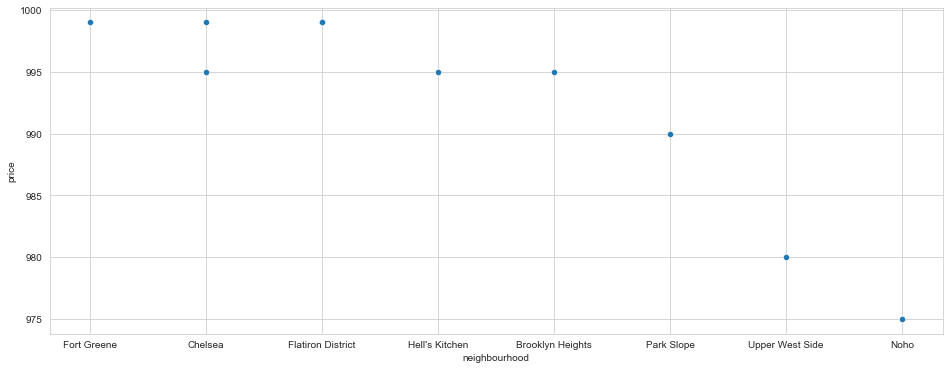

In [18]:
#method1
plt.figure(figsize=(16, 6))
sns.scatterplot(x="neighbourhood", y="price", data=df.sort_values('price', ascending=False).head(10))

Text(0.5, 1.0, 'Top 15 neighborhood with highest price')

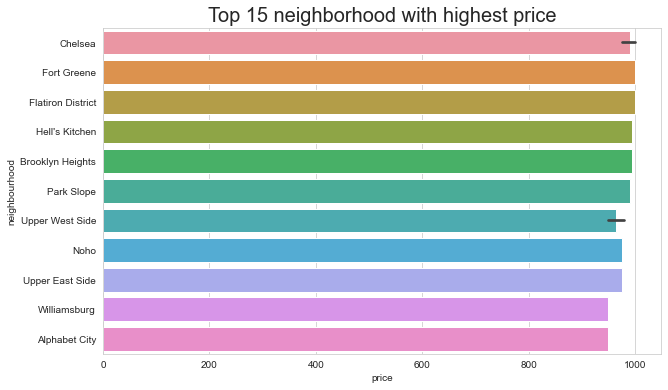

In [19]:
#method2
plt.figure(figsize =(10,6))
sns.barplot(x="price", y="neighbourhood", data=df.nlargest(15,['price']))
plt.title("Top 15 neighborhood with highest price",fontsize =20)

In [20]:
from collections import Counter
print(df[df['price']>900]['price'])
print(df[df['price']>900]['neighbourhood'])
Counter(np.asarray(df[df['price']>900]['neighbourhood'].values))

373      995
1103     950
1849     933
1901     950
4356     950
4930     980
8842     995
10822    995
10837    975
12659    999
14602    950
15379    990
17514    975
18092    927
18217    975
22840    999
23056    999
23595    999
25945    950
28601    950
Name: price, dtype: int64
373          Hell's Kitchen
1103        Upper West Side
1849                Midtown
1901           Williamsburg
4356          Alphabet City
4930        Upper West Side
8842       Brooklyn Heights
10822               Chelsea
10837                  Noho
12659               Chelsea
14602          West Village
15379            Park Slope
17514               Chelsea
18092    Financial District
18217       Upper East Side
22840           Fort Greene
23056     Flatiron District
23595     Flatiron District
25945              Flushing
28601          West Village
Name: neighbourhood, dtype: object


Counter({"Hell's Kitchen": 1,
         'Upper West Side': 2,
         'Midtown': 1,
         'Williamsburg': 1,
         'Alphabet City': 1,
         'Brooklyn Heights': 1,
         'Chelsea': 3,
         'Noho': 1,
         'West Village': 2,
         'Park Slope': 1,
         'Financial District': 1,
         'Upper East Side': 1,
         'Fort Greene': 1,
         'Flatiron District': 2,
         'Flushing': 1})

<AxesSubplot:xlabel='price', ylabel='neighbourhood'>

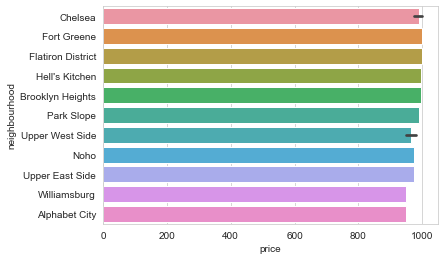

In [21]:
sns.barplot(x="price", y="neighbourhood", data=df.nlargest(15,['price']))




#### The average price income for private rooms,shared rooms and entire homes for each of the neighbourhoods is shown below.

<AxesSubplot:xlabel='price', ylabel='neighbourhood'>

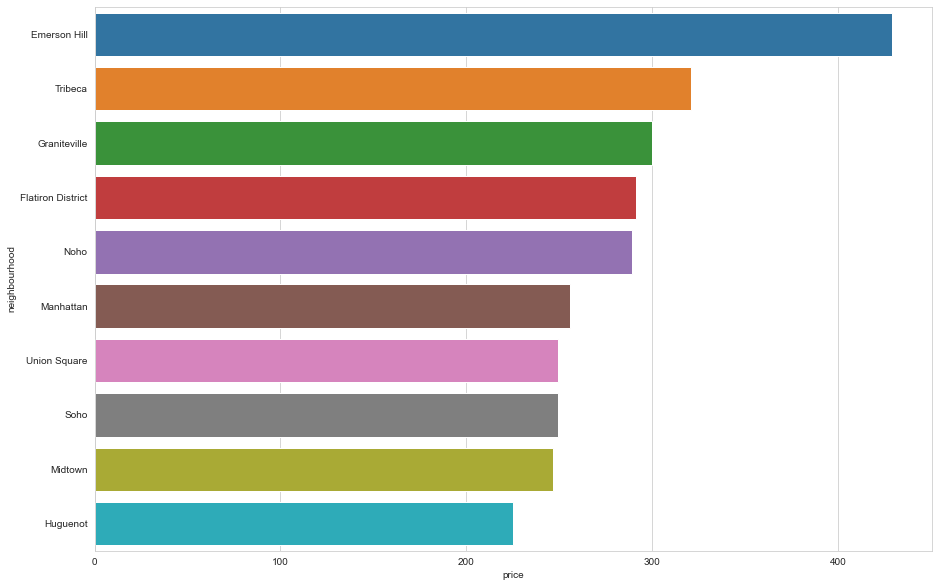

In [22]:
df['price'] = df['price'].fillna(np.median(df['price']))
df_top_prices_by_neighbourhood = df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price',ascending=False).reset_index()
df_top_prices_by_neighbourhood.columns
plt.figure(figsize=(15, 10))
sns.barplot(y="neighbourhood", x="price", data=df_top_prices_by_neighbourhood.head(10))

#### The average price income for private rooms,shared rooms and entire homes for each of the neighbourhoods is shown below.

In [23]:
df_neighbourhood_room_type_mean = df.groupby(['neighbourhood', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()

In [24]:
#renaming a column
df_neighbourhood_room_type_mean = df_neighbourhood_room_type_mean.rename(columns = {'price': 'average_region_price'})
#creating a pivot table
df_neighbourhood_room_type_mean_pivot = pd.pivot_table(df_neighbourhood_room_type_mean, values='average_region_price', 
                           index=['neighbourhood'], columns=['room_type'])

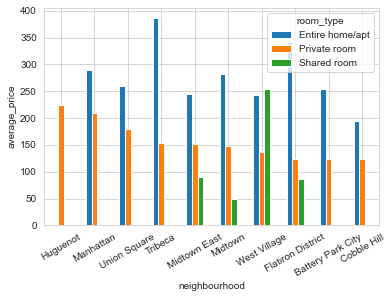

In [25]:
ax=df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).head(10).plot(kind='bar', width = 0.5)
ax.set_xlabel('neighbourhood', fontsize = 10)
ax.set_ylabel('average_price', fontsize = 10)
labels=list(df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:10])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

### process numerical and categorical features

In [26]:
# def StandardScaler(data):
#     mu = np.mean(data, axis = 0)
#     sigma = np.std(data, axis = 0)
#     return (data - mu)/sigma

In [27]:
# Numerical features
numerical_attribs = ['host_response_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates',
             'bathrooms', 'bedrooms', 'beds',
             'security_deposit', 'cleaning_fee', 'guests_included',
             'extra_people', 'minimum_nights', 'maximum_nights',
             'availability_30', 'availability_60', 'availability_90','availability_365','number_of_reviews','review_scores_rating',
             'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
             'review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month']

# Pipeline for numerical features
# 1. SimpleImputer: Replace NULL values with median
# 3. StandardScaler: Normalise values
# numerical_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy="median")), 
#         ('std_scaler', StandardScaler()),
#     ])

for feature in numerical_attribs:
    airbnb_listing_cleaned[feature] = airbnb_listing_cleaned[feature].fillna(np.mean(airbnb_listing_cleaned[feature]))
    #airbnb_listing_cleaned[feature] = (airbnb_listing_cleaned[feature]-airbnb_listing_cleaned[feature].mean())/airbnb_listing_cleaned[feature].std()

In [28]:
# Categorical features
categorical_attribs = ["host_response_time", "host_is_superhost", "neighbourhood",
                    "property_type", "room_type", "bed_type", "instant_bookable",
                    "is_business_travel_ready","cancellation_policy"]

# OrdinalEncoder(): Encode categorical features as integers
# categorical_pipeline = Pipeline([
#                             ('ordinal_encoder', OneHotEncoder()),
#                             ])
for feature in categorical_attribs:
    airbnb_listing_cleaned_one_hot = pd.get_dummies(airbnb_listing_cleaned[feature])
    airbnb_listing_cleaned = pd.concat([airbnb_listing_cleaned, airbnb_listing_cleaned_one_hot], axis =1)

In [29]:
airbnb_listing_y = airbnb_listing_cleaned['price']
airbnb_listing_y = airbnb_listing_cleaned['price'].fillna(np.median(airbnb_listing_cleaned['price']))
print(airbnb_listing_y.shape)

(29142,)


In [30]:
airbnb_listing_y[airbnb_listing_y==0] = np.median(airbnb_listing_y)

In [31]:
airbnb_listing_y.shape

(29142,)

In [32]:
airbnb_listing_cleaned = airbnb_listing_cleaned.drop(["host_response_time", "host_is_superhost", "neighbourhood",
                    "property_type", "room_type", "bed_type", "instant_bookable",
                    "is_business_travel_ready","cancellation_policy","price"], axis = 1)

In [33]:
airbnb_listing_cleaned

host_response_rate  host_listings_count  host_total_listings_count  \
0               93.447498                    1                          1   
1              100.000000                    3                          3   
2              100.000000                    1                          1   
3              100.000000                    1                          1   
4               60.000000                    1                          1   
...                   ...                  ...                        ...   
29137          100.000000                    1                          1   
29138          100.000000                    2                          2   
29139           94.000000                    4                          4   
29140           50.000000                    1                          1   
29141          100.000000                    2                          2   

       accommodates  bathrooms  bedrooms  beds  security_deposit  \
0                 1        1.0         1   1.0        189.882876   
1                 2        1.0         1   1.0        189.882876   
2                 2        1.5         1   1.0        189.882876   
3                 2        1.0         1   1.0        189.882876   
4                 2        1.0         1   1.0        189.882876   
...             ...        ...       ...   ...               ...   
29137             3        1.0         1   2.0          0.000000   
29138             3        1.0         1   1.0          0.000000   
29139             4        1.0         0   1.0        189.882876   
29140             2        1.0         2   2.0        470.000000   
29141             2        1.0         1   1.0          0.000000   

       cleaning_fee  guests_included  ...  Real Bed  f  t  f  t  flexible  \
0         58.153968                1  ...         1  0  1  1  0         1   
1         50.000000                2  ...         1  0  1  1  0         0   
2         30.000000                1  ...         1  1  0  1  0         0   
3         20.000000                1  ...         1  0  1  1  0         1   
4         60.000000                1  ...         1  1  0  1  0         0   
...             ...              ...  ...       ... .. .. .. ..       ...   
29137     10.000000                2  ...         1  1  0  1  0         0   
29138     25.000000                1  ...         1  1  0  1  0         0   
29139     75.000000                2  ...         0  0  1  1  0         0   
29140     51.000000                1  ...         1  1  0  1  0         0   
29141     40.000000                1  ...         1  1  0  1  0         0   

       moderate  strict  super_strict_30  super_strict_60  
0             0       0                0                0  
1             1       0                0                0  
2             1       0                0                0  
3             0       0                0                0  
4             1       0                0                0  
...         ...     ...              ...              ...  
29137         1       0                0                0  
29138         0       1                0                0  
29139         0       1                0                0  
29140         0       1                0                0  
29141         0       1                0                0  

[29142 rows x 283 columns]

In [34]:
# label = ['price']

In [35]:
# # Combine numerical and categorical features
# df_attribs = airbnb_listing_cleaned[categorical_attribs + numerical_attribs + label].copy()
# df_attribs_data = airbnb_listing_cleaned[categorical_attribs + numerical_attribs].copy()
# # Fit Preprocessing pipeline
# airbnb_listing_cleaned_prepared = preprocessing_pipeline.fit_transform(airbnb_listing_cleaned[categorical_attribs + numerical_attribs])

# # Save preprocessing pipeline
# #save_model(model=preprocessing_pipeline, save_path="preprocessing_pipeline.pkl")
# print(df_attribs_data.shape)

## Apply The different Models

### Split tran/test set

In [36]:
X = airbnb_listing_cleaned
X = X.loc[:,~X.columns.duplicated()]
X

host_response_rate  host_listings_count  host_total_listings_count  \
0               93.447498                    1                          1   
1              100.000000                    3                          3   
2              100.000000                    1                          1   
3              100.000000                    1                          1   
4               60.000000                    1                          1   
...                   ...                  ...                        ...   
29137          100.000000                    1                          1   
29138          100.000000                    2                          2   
29139           94.000000                    4                          4   
29140           50.000000                    1                          1   
29141          100.000000                    2                          2   

       accommodates  bathrooms  bedrooms  beds  security_deposit  \
0                 1        1.0         1   1.0        189.882876   
1                 2        1.0         1   1.0        189.882876   
2                 2        1.5         1   1.0        189.882876   
3                 2        1.0         1   1.0        189.882876   
4                 2        1.0         1   1.0        189.882876   
...             ...        ...       ...   ...               ...   
29137             3        1.0         1   2.0          0.000000   
29138             3        1.0         1   1.0          0.000000   
29139             4        1.0         0   1.0        189.882876   
29140             2        1.0         2   2.0        470.000000   
29141             2        1.0         1   1.0          0.000000   

       cleaning_fee  guests_included  ...  Airbed  Couch  Futon  \
0         58.153968                1  ...       0      0      0   
1         50.000000                2  ...       0      0      0   
2         30.000000                1  ...       0      0      0   
3         20.000000                1  ...       0      0      0   
4         60.000000                1  ...       0      0      0   
...             ...              ...  ...     ...    ...    ...   
29137     10.000000                2  ...       0      0      0   
29138     25.000000                1  ...       0      0      0   
29139     75.000000                2  ...       0      0      0   
29140     51.000000                1  ...       0      0      0   
29141     40.000000                1  ...       0      0      0   

       Pull-out Sofa  Real Bed  flexible  moderate  strict  super_strict_30  \
0                  0         1         1         0       0                0   
1                  0         1         0         1       0                0   
2                  0         1         0         1       0                0   
3                  0         1         1         0       0                0   
4                  0         1         0         1       0                0   
...              ...       ...       ...       ...     ...              ...   
29137              0         1         0         1       0                0   
29138              0         1         0         0       1                0   
29139              1         0         0         0       1                0   
29140              0         1         0         0       1                0   
29141              0         1         0         0       1                0   

       super_strict_60  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
29137                0  
29138                0  
29139                0  
29140                0  
29141                0  

[29142 rows x 279 columns]

In [37]:
y = airbnb_listing_y
y.shape

(29142,)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, 
                                                    shuffle=True, random_state=0)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26227, 279)
(2915, 279)
(26227,)
(2915,)


### KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score


In [40]:

knn = KNeighborsRegressor(n_neighbors=5)

# Fit and score
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.3235064841883871

In [41]:
knn_airbnb_listing_predictions = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_airbnb_listing_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

88.92719268383428

In [42]:
knn_r2 = r2_score(y_test, knn_airbnb_listing_predictions)
knn_r2

0.3235064841883871

/Users/dejavu/miniforge3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



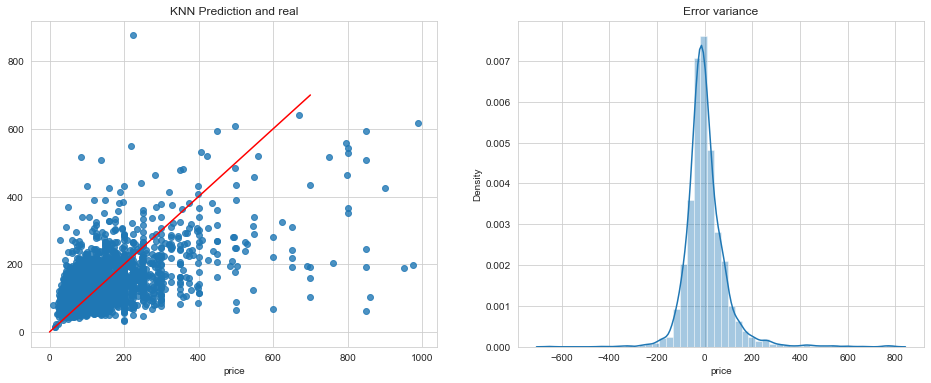

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot([0,700] , [0,700], c='r')
sns.regplot(x = y_test, y = knn_airbnb_listing_predictions, fit_reg=False)
plt.title('KNN Prediction and real')
plt.subplot(1,2,2)
sns.distplot(y_test - knn_airbnb_listing_predictions, bins = 50)
plt.title('Error variance')
plt.show()

Text(0.5, 1.0, 'Real and Predict Value Compare by KNN')

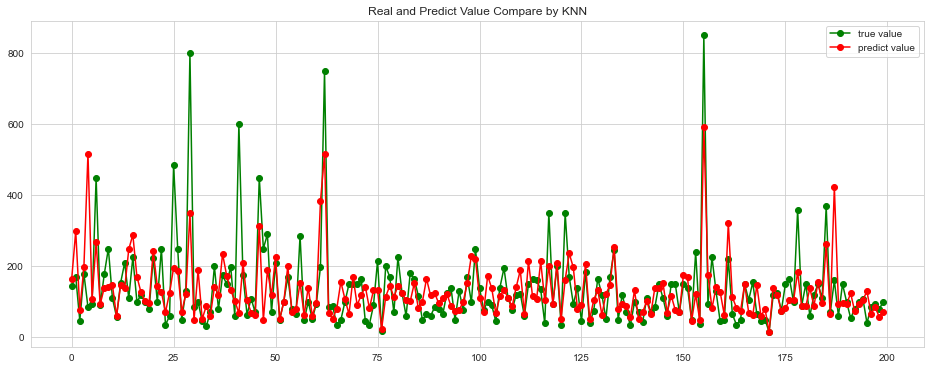

In [44]:
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(knn_airbnb_listing_predictions[0:200])), y_test[0:200],'go-',label='true value')
plt.plot(np.arange(len(knn_airbnb_listing_predictions[0:200])),knn_airbnb_listing_predictions[0:200],'ro-',label='predict value')
plt.legend()
plt.title("Real and Predict Value Compare by KNN")

### Using Linear Regression

In [45]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

In [46]:
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
airbnb_listing_predictions = lin_reg.predict(X_test)
print(airbnb_listing_predictions[0:10])
print(y_test[0:10])
lin_mse = mean_squared_error(y_test, airbnb_listing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

[188.71182437 178.67022233  61.85725107 242.87101176 173.70698011
  84.01898778 339.25768828  87.06483004 235.24087302 147.29058581]
15810    145
16753    170
23398     47
6343     179
10491     85
5187      95
20702    450
3046      90
11800    178
20768    250
Name: price, dtype: int64


67.03584624114505

In [47]:
lin_r2 = r2_score(y_test, airbnb_listing_predictions)
lin_r2

0.6155776177203469

/Users/dejavu/miniforge3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



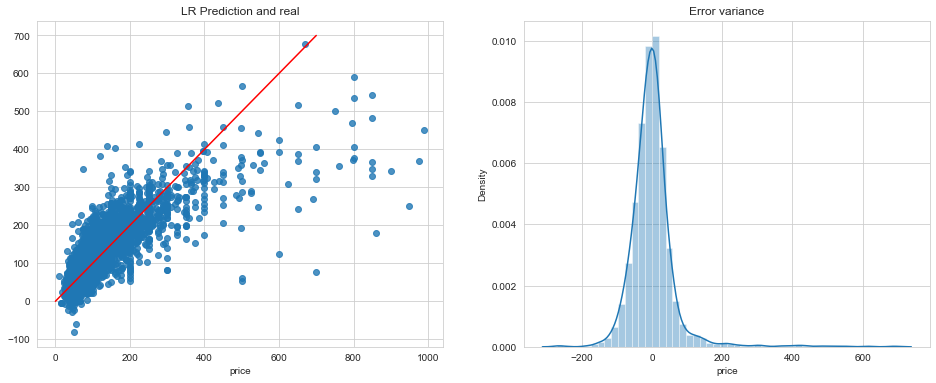

In [48]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot([0,700] , [0,700], c='r')
sns.regplot(x = y_test, y = airbnb_listing_predictions, fit_reg=False)
plt.title('LR Prediction and real')
plt.subplot(1,2,2)
sns.distplot(y_test - airbnb_listing_predictions, bins = 50)
plt.title('Error variance')
plt.show()

Text(0.5, 1.0, 'Real and Predict Value Compare by LR')

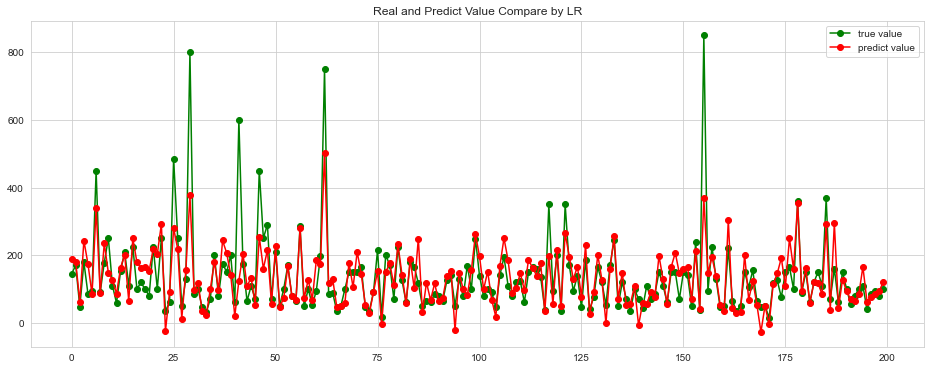

In [49]:
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(airbnb_listing_predictions[0:200])), y_test[0:200],'go-',label='true value')
plt.plot(np.arange(len(airbnb_listing_predictions[0:200])),airbnb_listing_predictions[0:200],'ro-',label='predict value')
plt.legend()
plt.title("Real and Predict Value Compare by LR")

### Using Decision Tree Regression

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
decision_regression_predict = decision_tree.predict(X_test)
tree_mse = mean_squared_error(y_test, decision_regression_predict)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

95.16144492567908

In [53]:
tree_r2 = r2_score(y_test, decision_regression_predict)
tree_r2

0.22533037261110178

#### GridSearchCV

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Grid Search Cross Validation
# Specify discrete values for hyperparameters
param_grid = [
    {'max_depth': [1, 20, 100], 'max_features': [1, 5, 15, 20],
     'max_leaf_nodes': [5, 100, 1000]},
]
search_Gs = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=10,
                      scoring='neg_mean_squared_error', return_train_score=True)

search_Gs.fit(X_train, y_train)

# Randomised search Cross Validation
# Specify distribution for hyperparameters
param_distribs = {
  'max_depth': [1, 20, 100],
  'max_features': [1, 5, 15, 20],
}
search_Rs = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_distribs,
                            n_iter=5, cv=10, scoring='neg_mean_squared_error',
                            random_state=42, return_train_score=True)

search_Rs.fit(X_train, y_train)

print("Optimal hyperparameter combination for GridSearchCV:", search_Gs.best_params_)
print("Optimal hyperparameter combination for RandomizedSearchCV:", search_Rs.best_params_)

Optimal hyperparameter combination for GridSearchCV: {'max_depth': 20, 'max_features': 20, 'max_leaf_nodes': 100}
Optimal hyperparameter combination for RandomizedSearchCV: {'max_features': 5, 'max_depth': 20}


In [55]:
search_Gs.best_estimator_.fit(X_train, y_train)
print(search_Gs.best_estimator_)
decision_regression_best_predict = search_Gs.best_estimator_.predict(X_test)
tree_mse_best = mean_squared_error(y_test, decision_regression_best_predict)
tree_rmse_best = np.sqrt(tree_mse_best)
tree_rmse_best

DecisionTreeRegressor(max_depth=20, max_features=20, max_leaf_nodes=100,
                      random_state=42)


81.6142041534362

In [56]:
decision_regression_best_predict[0:10]

array([177.19847328, 186.62683824,  74.34991817, 177.19847328,
       177.19847328,  74.34991817, 321.17475728, 111.94444444,
       194.97142857, 177.19847328])

In [57]:
y_test[0:10]

15810    145
16753    170
23398     47
6343     179
10491     85
5187      95
20702    450
3046      90
11800    178
20768    250
Name: price, dtype: int64

In [58]:
tree_r2 = r2_score(y_test, decision_regression_best_predict)
tree_r2

0.4301953704464466

In [59]:
train_sizes, train_scores, valid_scores, fit_times, score_times = learning_curve(search_Gs.best_estimator_, X_train, y_train,
                                                                                 train_sizes=np.linspace(0.1, 1, 20), cv=10,
                                                                                 scoring="neg_mean_squared_error", 
                                                                                 return_times=True)

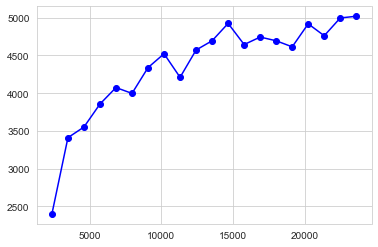

In [60]:
plt.plot(train_sizes, -train_scores.mean(1), "o-", color="b", label="DecisionTreeRegression")

/Users/dejavu/miniforge3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



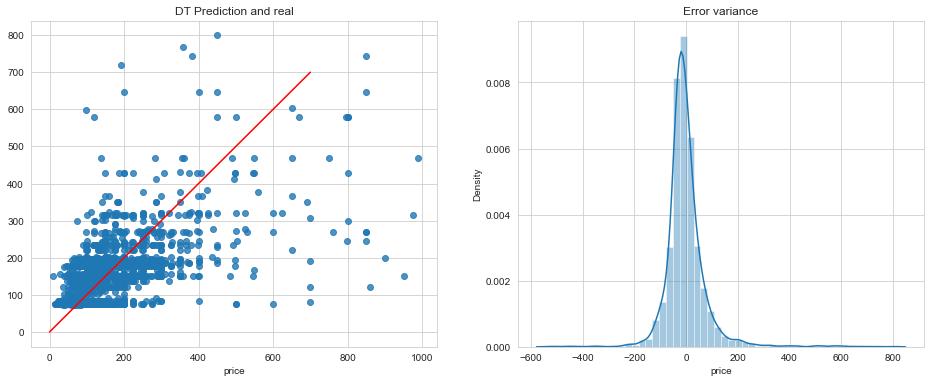

In [61]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot([0,700] , [0,700], c='r')
sns.regplot(x = y_test, y = decision_regression_best_predict, fit_reg=False)
plt.title('DT Prediction and real')
plt.subplot(1,2,2)
sns.distplot(y_test - decision_regression_best_predict, bins = 50)
plt.title('Error variance')
plt.show()

Text(0.5, 1.0, 'Real and Predict Value Compare by DT')

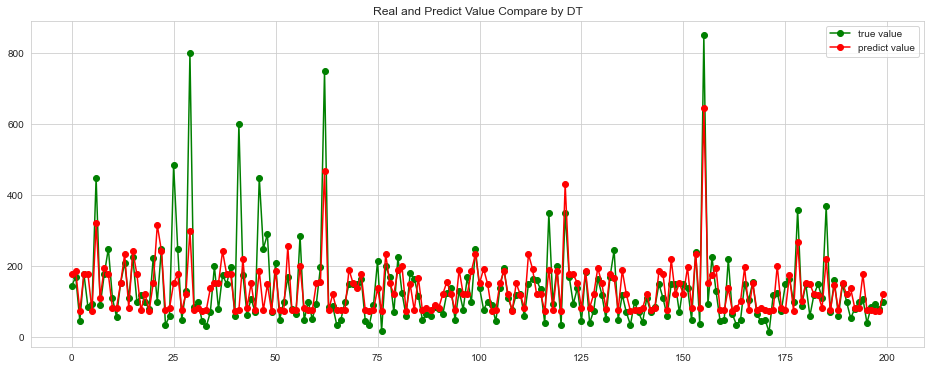

In [62]:
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(decision_regression_best_predict[0:200])), y_test[0:200],'go-',label='true value')
plt.plot(np.arange(len(decision_regression_best_predict[0:200])),decision_regression_best_predict[0:200],'ro-',label='predict value')
plt.legend()
plt.title("Real and Predict Value Compare by DT")

### XgBoost

In [63]:
import xgboost as xgb
from xgboost import plot_importance
model = xgb.XGBRegressor(learning_rate = 0.01, n_estimators = 1000)
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
xgb_pred_test = model.predict(X_test)

In [ ]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred_test))
xgb_r2 = r2_score(y_test, xgb_pred_test)

In [ ]:
print("\nTesting RMSE:", round(xgb_rmse,4))
print("\nTesting r2:", round(xgb_r2,4))

In [ ]:
plot_importance(model, max_num_features=15)

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot([0,700] , [0,700], c='r')
sns.regplot(x = y_test, y = xgb_pred_test, fit_reg=False)
plt.title('RF Prediction and real')
plt.subplot(1,2,2)
sns.distplot(y_test - xgb_pred_test, bins = 50)
plt.title('Error variance')
plt.show()

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(xgb_pred_test[0:200])), y_test[0:200],'go-',label='true value')
plt.plot(np.arange(len(xgb_pred_test[0:200])),xgb_pred_test[0:200],'ro-',label='predict value')
plt.legend()
plt.title("Real and Predict Value Compare by XGB")

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# X_fit = std.fit(X_train)
# X_train = X_fit.transform(X_train)
# X_test = X_fit.transform(X_test)

In [ ]:
rf = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
rf.fit(X_train,y_train)
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test,y_test_predict))

In [ ]:
rmse_rf

In [ ]:
rf_r2 = r2_score(y_test, y_test_predict)
rf_r2

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot([0,700] , [0,700], c='r')
sns.regplot(x = y_test, y = y_test_predict, fit_reg=False)
plt.title('RF Prediction and real')
plt.subplot(1,2,2)
sns.distplot(y_test - y_test_predict, bins = 50)
plt.title('Error variance')
plt.show()

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(y_test_predict[0:200])), y_test[0:200],'go-',label='true value')
plt.plot(np.arange(len(y_test_predict[0:200])),y_test_predict[0:200],'ro-',label='predict value')
plt.legend()
plt.title("Real and Predict Value Compare by RF")

### LGBMRegressor

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
fit_params ={'early_stopping_rounds':200,
            'eval_metric':'rmse',
            'eval_set':[(X_test,y_test)],
            'eval_names':['valid'],
            'verbose':100}

In [ ]:
lgb = LGBMRegressor(max_depth=50,learning_rate =0.01,n_estimators=2000)
lgb.fit(X_train,y_train,**fit_params)

In [ ]:
y_pred_lgb = lgb.predict(X_test)

In [ ]:
LGBM_r2 = r2_score(y_test,y_pred_lgb)
LGBM_r2

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot([0,700] , [0,700], c='r')
sns.regplot(x = y_test, y = y_pred_lgb, fit_reg=False)
plt.title('LGB Prediction and real')
plt.subplot(1,2,2)
sns.distplot(y_test - y_pred_lgb, bins = 50)
plt.title('Error variance')
plt.show()

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(y_test_predict[0:300])), y_test[0:300],'go-',label='true value')
plt.plot(np.arange(len(y_test_predict[0:300])),y_test_predict[0:300],'ro-',label='predict value')
plt.legend()
plt.title("Real and Predict Value Compare by LGBM")

In [ ]:
model_list = ["KNN","LR","DT","XGB","RF","LGBM"]
RMSE = [knn_rmse, lin_rmse, tree_rmse_best, xgb_rmse, rmse_rf, 59.7132]
R_2 = [knn_r2*100, lin_r2*100, tree_r2*100, xgb_r2*100, rf_r2*100, LGBM_r2*100]
# rmse_df = pd.DataFrame(RMSE, columns = model_list)
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.xlabel("model list")
plt.ylabel("RMSE")
plt.title("RMSE")
# sns.barplot(x = "model list", y = "RMSE", data = rmse_df)
sns.lineplot(model_list,RMSE)
plt.subplot(1,2,2)
plt.xlabel("model list")
plt.ylabel("R_2%")
plt.title("R_2")
sns.lineplot(model_list,R_2)

In [40]:
y_log = np.log(airbnb_listing_y)
y_log

0        3.806662
1        4.553877
2        4.094345
3        4.248495
4        4.644391
           ...   
29137    5.010635
29138    5.164786
29139    5.298317
29140    4.543295
29141    4.595120
Name: price, Length: 29142, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.10, 
                                                    shuffle=True, random_state=0)

### KNN

In [67]:
knn.fit(X_train_log, y_train_log)
knn_predictions = knn.predict(X_test_log)
knn_predictions_train = knn.predict(X_train_log)
knn_mse_log = mean_squared_error(y_test_log, knn_predictions)
knn_mse_log_train = mean_squared_error(y_train_log, knn_predictions_train)
knn_rmse_log = np.sqrt(knn_mse_log)
knn_rmse_log_train = np.sqrt(knn_mse_log_train)
print("test RMSE:",knn_rmse_log)
print("train RMSE:",knn_rmse_log_train)

test RMSE: 0.5266430415386131
train RMSE: 0.4279319371724507


In [68]:
knn_r2_log = r2_score(y_test_log, knn_predictions)
knn_r2_log_train = r2_score(y_train_log, knn_predictions_train)
print("test r2:",knn_r2_log)
print("train r2:",knn_r2_log_train)

test r2: 0.3410132539800602
train r2: 0.5552212684978421


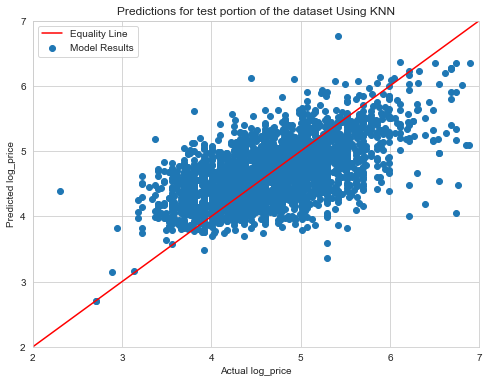

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_log,knn_predictions, label="Model Results")
plt.plot([2,7],[2,7], color="red", label = "Equality Line")
plt.title("Predictions for test portion of the dataset Using KNN")
plt.xlim(2,7)
plt.ylim(2,7)
plt.legend()
plt.ylabel("Predicted log_price")
plt.xlabel("Actual log_price")
plt.show()

### LR

In [70]:
lin_reg.fit(X_train_log, y_train_log)
y_lr_test_log_predict = lin_reg.predict(X_test_log)
y_lr_train_log_predict = lin_reg.predict(X_train_log)

In [71]:
rmse_lr = np.sqrt(mean_squared_error(y_test_log,y_lr_test_log_predict))
rmse_lr_train = np.sqrt(mean_squared_error(y_train_log,y_lr_train_log_predict))
print("test rmse:",rmse_lr)
print("train rmse:",rmse_lr_train)

test rmse: 0.330477407016059
train rmse: 0.32725708606323983


In [72]:
rf_lr = r2_score(y_test_log, y_lr_test_log_predict)
rf_lr_train = r2_score(y_train_log, y_lr_train_log_predict)
print("test r2:",rf_lr)
print("train r2:",rf_lr_train)

test r2: 0.7405058759730576
train r2: 0.7398806077729783


In [73]:
lin_reg.intercept_

3.3892618175789675

In [74]:
lin_reg.coef_

array([ 8.23029798e-04, -3.34015863e+04,  3.34015864e+04,  7.68854152e-02,
        7.03616229e-02,  1.02772087e-01, -2.36202480e-02,  9.76081385e-05,
        1.41599788e-03,  2.22265000e-02,  3.34370003e-04, -2.39655945e-03,
        9.98398586e-11,  4.97220111e-03, -2.06775010e-03,  1.73755665e-03,
        1.72537683e-04,  2.27103944e-05,  3.47657866e-03,  8.98035874e-03,
        3.15972564e-02,  1.04527652e-03,  2.93986234e-03,  1.72509706e-02,
       -4.72367843e-02, -9.87160163e-03, -2.44483626e-02,  5.07440792e-02,
        2.56921172e-02, -4.86092012e-02, -6.48383741e-02, -4.12670314e-02,
       -1.52823115e-01, -8.76221475e-02, -2.18593738e-01,  5.33349555e-01,
       -3.70545461e-02, -1.54796592e-01,  1.11040718e-01, -1.44936572e-01,
        7.37076501e-01, -8.50374886e-03, -2.24147447e-01, -5.05886710e-02,
       -7.74036749e-02,  4.75101411e-02, -3.62326656e-01, -1.89272272e-01,
       -4.37722330e-01,  3.78207090e-01, -1.64643222e-01,  1.76947574e-02,
       -1.89341970e-01,  

In [ ]:
train_sizes, train_score, test_score = learning_curve(
    LinearRegression(), X_train_log, y_train_log, cv=10, scoring='r2',
    train_sizes=np.linspace(0.0, 1.0, num=30)[1:])

train_score_mean = np.mean(train_score, axis=1)
test_score_mean = np.mean(test_score, axis=1)

plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training")
# plt.plot(train_sizes, -test_score_mean, 'o-', color="g",
#         label="Validation")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

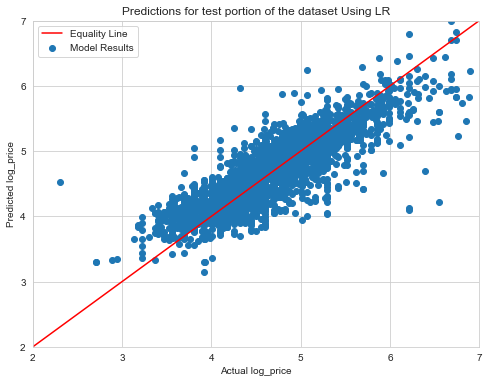

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_log,y_lr_test_log_predict, label="Model Results")
plt.plot([2,7],[2,7], color="red", label = "Equality Line")
plt.title("Predictions for test portion of the dataset Using LR")
plt.xlim(2,7)
plt.ylim(2,7)
plt.legend()
plt.ylabel("Predicted log_price")
plt.xlabel("Actual log_price")
plt.show()

### DT

In [76]:
decision_tree.fit(X_train_log, y_train_log)
y_dt_test_log_predict = decision_tree.predict(X_test_log)
y_dt_train_log_predict = decision_tree.predict(X_train_log)
search_Gs.best_estimator_.fit(X_train_log, y_train_log)
y_dt_test_log_predict_best = search_Gs.best_estimator_.predict(X_test_log)
y_dt_train_log_predict_best = search_Gs.best_estimator_.predict(X_train_log)

In [77]:
# rmse_dt = np.sqrt(mean_squared_error(y_test_log,y_dt_test_log_predict))
# rmse_dt_train = np.sqrt(mean_squared_error(y_train_log,y_dt_train_log_predict))
rmse_dt = np.sqrt(mean_squared_error(y_test_log,y_dt_test_log_predict_best))
rmse_dt_train = np.sqrt(mean_squared_error(y_train_log,y_dt_train_log_predict_best))
print("test rmse:",rmse_dt)
print("train rmse:",rmse_dt_train)

test rmse: 0.44255389787146043
train rmse: 0.4345736290659364


In [78]:
# dt_r2 = r2_score(y_test_log, y_dt_test_log_predict)
# dt_r2_train = r2_score(y_train_log, y_dt_train_log_predict)
dt_r2 = r2_score(y_test_log, y_dt_test_log_predict_best)
dt_r2_train = r2_score(y_train_log, y_dt_train_log_predict_best)
print("test rmse:",dt_r2)
print("train rmse:",dt_r2_train)

test rmse: 0.534653641512401
train rmse: 0.5413078052908576


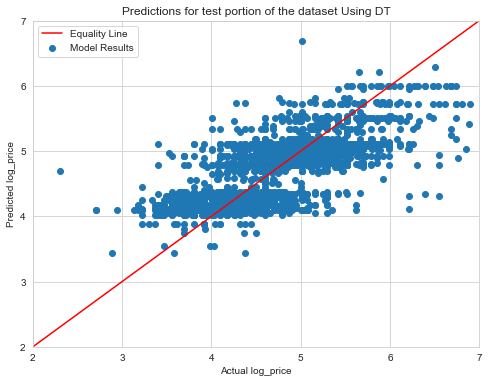

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_log,y_dt_test_log_predict_best, label="Model Results")
plt.plot([2,7],[2,7], color="red", label = "Equality Line")
plt.title("Predictions for test portion of the dataset Using DT")
plt.xlim(2,7)
plt.ylim(2,7)
plt.legend()
plt.ylabel("Predicted log_price")
plt.xlabel("Actual log_price")
plt.show()

In [80]:
#derive important features
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train_log.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("Number of important features: "+str(feature_importances[feature_importances["importance"]!=0].shape[0]))
print("\nTop fifteen features by importance:")
feature_importances[feature_importances["importance"]!=0].head(15)

Number of important features: 209

Top fifteen features by importance:


importance
Entire home/apt           0.443493
cleaning_fee              0.065746
bathrooms                 0.056868
accommodates              0.032414
review_scores_location    0.029735
reviews_per_month         0.028322
extra_people              0.020796
number_of_reviews         0.019230
availability_365          0.018652
minimum_nights            0.015232
maximum_nights            0.014738
security_deposit          0.013151
review_scores_rating      0.012920
availability_90           0.010821
bedrooms                  0.010458

### XGB

In [81]:
model.fit(X_train_log, y_train_log)
y_xgb_test_log_predict = model.predict(X_test_log)
y_xgb_train_log_predict = model.predict(X_train_log)

In [82]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_log,y_xgb_test_log_predict))
rmse_xgb_train = np.sqrt(mean_squared_error(y_train_log,y_xgb_train_log_predict))
print("test rmse:", rmse_xgb)
print("train rmse:", rmse_xgb_train)

test rmse: 0.33343678825060064
train rmse: 0.303827421439638


In [83]:
xgb_r2 = r2_score(y_test_log, y_xgb_test_log_predict)
xgb_r2_train = r2_score(y_train_log, y_xgb_train_log_predict)
print("test rmse:", xgb_r2)
print("train rmse:", xgb_r2_train)

test rmse: 0.7358375964830035
train rmse: 0.7757933198252148


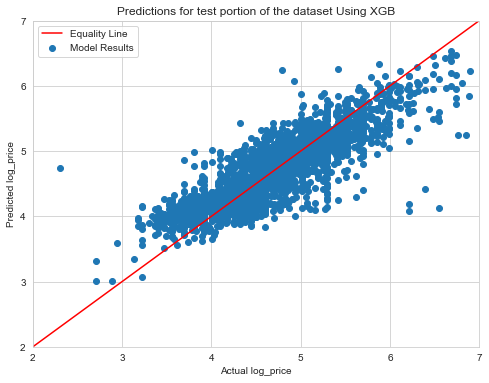

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_log,y_xgb_test_log_predict, label="Model Results")
plt.plot([2,7],[2,7], color="red", label = "Equality Line")
plt.title("Predictions for test portion of the dataset Using XGB")
plt.xlim(2,7)
plt.ylim(2,7)
plt.legend()
plt.ylabel("Predicted log_price")
plt.xlabel("Actual log_price")
plt.show()

Text(0.5, 1.0, 'Real and Predict Value Compare by XGB')

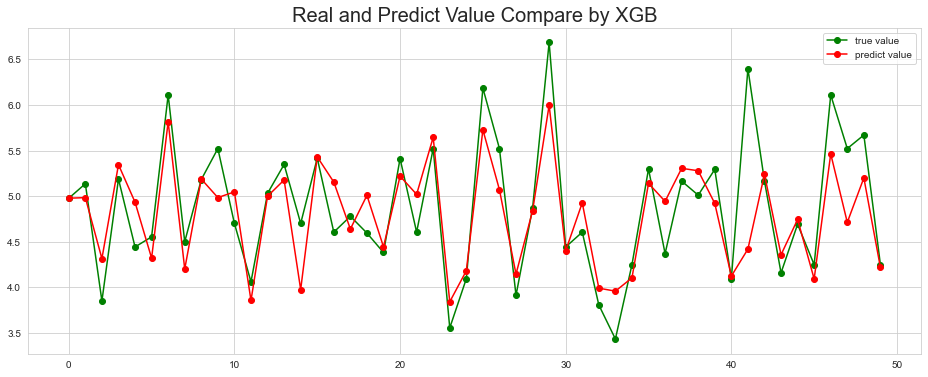

In [85]:
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(y_xgb_test_log_predict[0:50])), y_test_log[0:50],'go-',label='true value')
plt.plot(np.arange(len(y_xgb_test_log_predict[0:50])),y_xgb_test_log_predict[0:50],'ro-',label='predict value')
plt.legend()
plt.title("Real and Predict Value Compare by XGB",fontsize=20)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


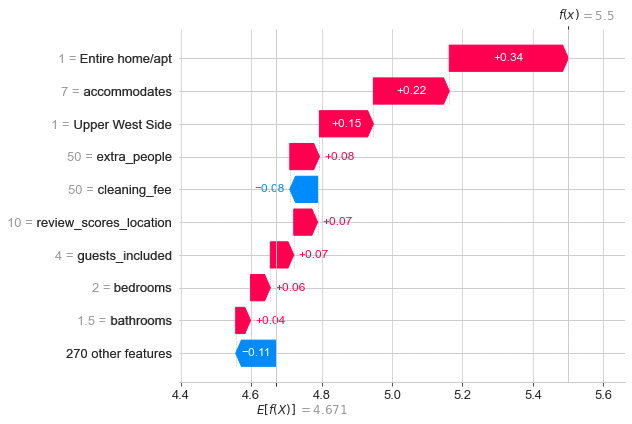

In [86]:
import shap
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train_log)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

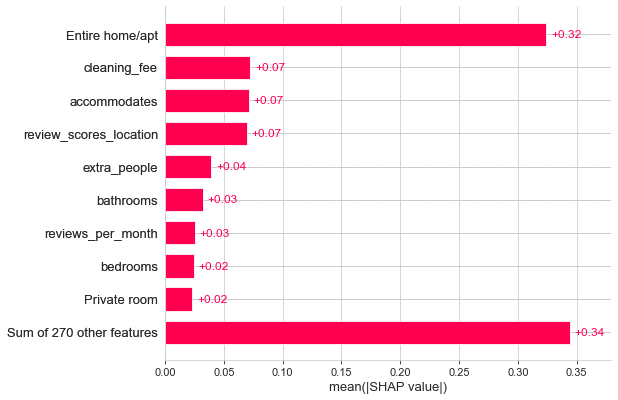

In [87]:
shap.plots.bar(shap_values)

In [93]:
shap.initjs()
shap.plots.force(shap_values[0])

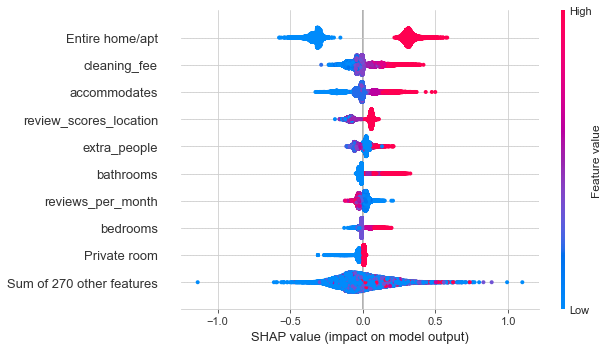

In [96]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

In [89]:
#derive important features
feature_importances_xgb = pd.DataFrame(model.feature_importances_,
                                   index = X_train_log.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("Number of important features: "+str(feature_importances_xgb[feature_importances["importance"]!=0].shape[0]))
print("\nTop fifteen features by importance:")
feature_importances_xgb[feature_importances_xgb["importance"]!=0].head(10)

Number of important features: 209

Top fifteen features by importance:


Boolean Series key will be reindexed to match DataFrame index.


importance
Entire home/apt           0.575619
bathrooms                 0.033945
review_scores_location    0.009339
Hell's Kitchen            0.009199
West Village              0.009172
cleaning_fee              0.008422
Chelsea                   0.008365
Upper West Side           0.008233
Bushwick                  0.007922
East Village              0.007860

Text(0.5, 1.0, 'Top 15 important features for xgb')

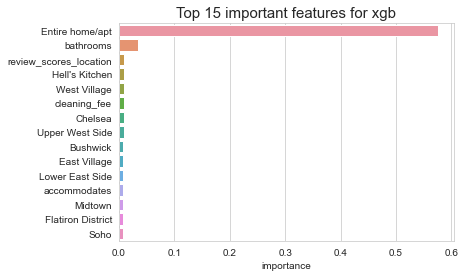

In [90]:
sns.barplot(x="importance", y=feature_importances_xgb[feature_importances_xgb["importance"]!=0].head(15).index, data = feature_importances_xgb[feature_importances_xgb["importance"]!=0].head(15))
plt.title("Top 15 important features for xgb",fontsize=15)


### RF

In [47]:
rf=RandomForestRegressor(n_estimators = 500, min_samples_leaf=1, random_state=1)
rf.fit(X_train_log,y_train_log)
y_test_log_predict = rf.predict(X_test_log)
y_train_log_predict = rf.predict(X_train_log)

In [50]:
rmse_rf = np.sqrt(mean_squared_error(y_test_log,y_test_log_predict))
rmse_rf_train = np.sqrt(mean_squared_error(y_train_log,y_train_log_predict))
print("test rmse:",rmse_rf)
print("train rmse:",rmse_rf_train)

test rmse: 0.3481142516553736
train rmse: 0.12807083254268228


In [51]:
rf_r2 = r2_score(y_test_log, y_test_log_predict)
rf_r2_train = r2_score(y_train_log, y_train_log_predict)
print("test rmse:",rf_r2)
print("train rmse:",rf_r2_train)

test rmse: 0.7120695564496156
train rmse: 0.9601622246777279


In [57]:
np.max(y_test_log_predict-y_test_log)

2.395828053948402

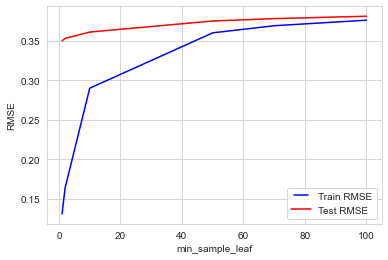

In [105]:
#optimizing min_sample_leaf
train_results = []
test_results = []
min_samples_leaf = [1,2,10,50,70,100]
for leaf in min_samples_leaf:
    rf = RandomForestRegressor(min_samples_leaf = leaf, max_features='auto', n_estimators=100, n_jobs=-1, random_state=1)
    rf.fit(X_train_log, y_train_log)
    train_pred = rf.predict(X_train_log)
    rmse = round(np.sqrt(mean_squared_error(y_train_log, train_pred)),3)
    train_results.append(rmse)
    y_pred = rf.predict(X_test_log)
    rmse = round(np.sqrt(mean_squared_error(y_test_log, y_pred)),3)
    test_results.append(rmse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_sample_leaf')
plt.show()

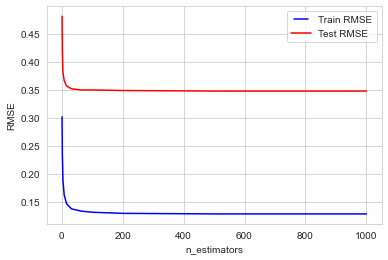

In [106]:
#optimizing number of estimators
train_results = []
test_results = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200,500,1000]
for estimator in n_estimators:
    rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1, random_state=1)
    rf.fit(X_train_log, y_train_log)
    train_pred = rf.predict(X_train_log)
    rmse = round(np.sqrt(mean_squared_error(y_train_log, train_pred)),3)
    train_results.append(rmse)
    y_pred = rf.predict(X_test_log)
    rmse = round(np.sqrt(mean_squared_error(y_test_log, y_pred)),3)
    test_results.append(rmse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('n_estimators')
plt.show()

In [107]:
test_results

[0.482, 0.417, 0.381, 0.367, 0.357, 0.352, 0.35, 0.35, 0.349, 0.348, 0.348]

In [108]:
rf=RandomForestRegressor(n_estimators = 500, min_samples_leaf=1, random_state=1)
rf.fit(X_train_log,y_train_log)
predicted = rf.predict(X_test_log)

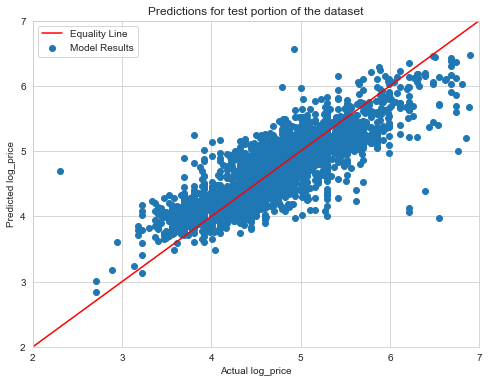

In [109]:
#plot the results of the model:
plt.figure(figsize=(8,6))
plt.scatter(y_test_log,y_test_log_predict, label="Model Results")
plt.plot([2,7],[2,7], color="red", label = "Equality Line")
plt.title("Predictions for test portion of the dataset")
plt.xlim(2,7)
plt.ylim(2,7)
plt.legend()
plt.ylabel("Predicted log_price")
plt.xlabel("Actual log_price")
plt.show()

Text(0.5, 1.0, 'Real and Predict Value Compare by RF')

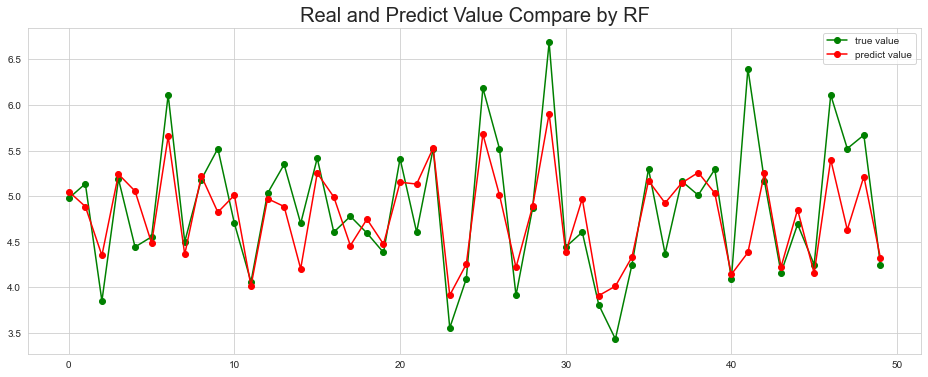

In [110]:
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(y_test_log_predict[0:50])), y_test_log[0:50],'go-',label='true value')
plt.plot(np.arange(len(y_test_log_predict[0:50])),y_test_log_predict[0:50],'ro-',label='predict value')
plt.legend()
plt.title("Real and Predict Value Compare by RF",fontsize=20)

Text(0.5, 1.0, 'Real and Predict Value Compare by RF')

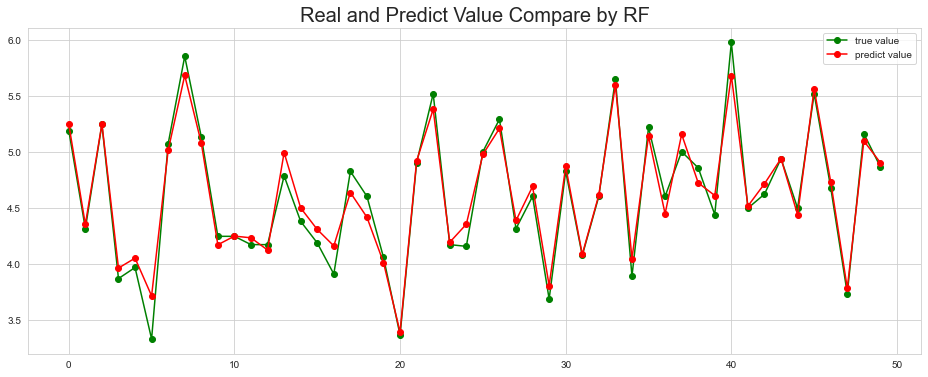

In [111]:
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(y_train_log_predict[0:50])), y_train_log[0:50],'go-',label='true value')
plt.plot(np.arange(len(y_train_log_predict[0:50])),y_train_log_predict[0:50],'ro-',label='predict value')
plt.legend()
plt.title("Real and Predict Value Compare by RF",fontsize=20)

In [112]:
#derive important features
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train_log.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("Number of important features: "+str(feature_importances[feature_importances["importance"]!=0].shape[0]))
print("\nTop fifteen features by importance:")
feature_importances[feature_importances["importance"]!=0].head(15)

Number of important features: 277

Top fifteen features by importance:


importance
Entire home/apt           0.443514
cleaning_fee              0.067368
bathrooms                 0.054523
accommodates              0.034089
review_scores_location    0.029960
reviews_per_month         0.029448
extra_people              0.020606
number_of_reviews         0.018817
availability_365          0.017150
minimum_nights            0.015246
maximum_nights            0.014810
review_scores_rating      0.013194
security_deposit          0.012893
availability_90           0.011144
bedrooms                  0.010988

Text(0.5, 1.0, 'Top 15 important features for RF')

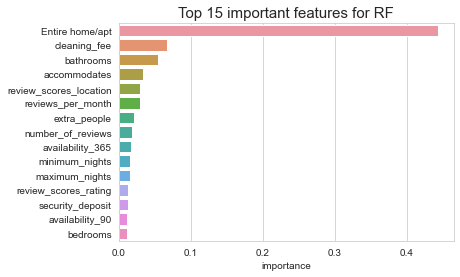

In [113]:
sns.barplot(x="importance", y=feature_importances[feature_importances["importance"]!=0].head(15).index, data = feature_importances[feature_importances["importance"]!=0].head(15))
plt.title("Top 15 important features for RF",fontsize=15)



List the top 5 related features with price usig pearson

In [325]:
price_corr_values = sorted(airbnb_listing.corr(method = "pearson")['price'].values, reverse = True)

In [326]:
airbnb_listing.corr(method = "pearson")['price']

id                               -0.066027
host_id                          -0.038143
host_response_rate               -0.001118
host_listings_count               0.019825
host_total_listings_count         0.019825
zipcode                          -0.207303
latitude                          0.054884
longitude                        -0.286282
accommodates                      0.581247
bathrooms                         0.283037
bedrooms                          0.453635
beds                              0.490429
price                             1.000000
security_deposit                  0.252139
cleaning_fee                      0.623510
guests_included                   0.381124
extra_people                      0.133662
minimum_nights                   -0.002661
maximum_nights                   -0.001004
availability_30                   0.012028
availability_60                  -0.001186
availability_90                  -0.006336
availability_365                  0.074385
number_of_r

In [338]:
price_corr_values_top15 = price_corr_values[1:16]
price_corr_values_top15

[0.6235097901244027,
 0.5812469978656227,
 0.490429174223664,
 0.4536348123908095,
 0.38112418860887204,
 0.2830369441426034,
 0.2521387063317129,
 0.15477380649575576,
 0.13366236752322522,
 0.07438468564131193,
 0.06651929712662565,
 0.054884408784397626,
 0.051132284267486346,
 0.019824519059413695,
 0.019824519059413695]

In [339]:
price_corr_colums = np.argsort(-np.asarray(airbnb_listing.corr(method = "pearson")['price']))
price_corr_colums

array([12, 14,  8, 11, 10, 15,  9, 13, 29, 16, 22, 26,  6, 24,  4,  3, 25,
       19, 28, 23, 27, 18,  2, 20, 17, 21, 30, 32,  1,  0, 31,  5,  7])

In [340]:
price_corr_colums_top15 = price_corr_colums[1:16]
price_corr_colums_top15

array([14,  8, 11, 10, 15,  9, 13, 29, 16, 22, 26,  6, 24,  4,  3])

In [341]:
top15_feature_list = []
for i in range(len(price_corr_colums_top15)):
    top15_feature_list.append(airbnb_listing.corr(method = "pearson")['price'].index[price_corr_colums_top15[i]])
top15_feature_list

['cleaning_fee',
 'accommodates',
 'beds',
 'bedrooms',
 'guests_included',
 'bathrooms',
 'security_deposit',
 'review_scores_location',
 'extra_people',
 'availability_365',
 'review_scores_cleanliness',
 'latitude',
 'review_scores_rating',
 'host_total_listings_count',
 'host_listings_count']

Text(0.5, 1.0, 'Top 15 importance features by Pearon Correlation')

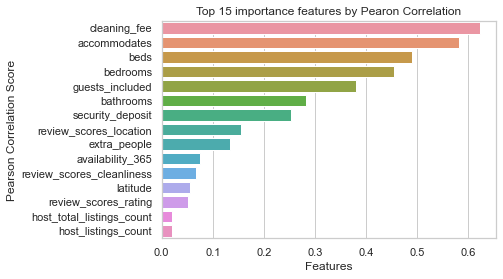

In [343]:
sns.barplot(x = price_corr_values_top15, y = top15_feature_list)
plt.ylabel('Pearson Correlation Score')
plt.xlabel('Features')
plt.title("Top 15 importance features by Pearon Correlation")

## Process the calender data

In [100]:
airbnb_calender = pd.read_csv("../data_set/calendar.csv.gz")

In [101]:
airbnb_calender.head(10)

listing_id        date available   price adjusted_price  minimum_nights  \
0       63320  2020-12-11         t  $45.00         $45.00            30.0   
1       30031  2020-12-11         f  $49.00         $49.00            30.0   
2       30031  2020-12-12         f  $49.00         $49.00            30.0   
3       30031  2020-12-13         f  $49.00         $49.00            30.0   
4       30031  2020-12-14         f  $49.00         $49.00            30.0   
5       30031  2020-12-15         f  $49.00         $49.00            30.0   
6       30031  2020-12-16         f  $49.00         $49.00            30.0   
7       30031  2020-12-17         f  $49.00         $49.00            30.0   
8       30031  2020-12-18         f  $49.00         $49.00            30.0   
9       30031  2020-12-19         f  $49.00         $49.00            30.0   

   maximum_nights  
0           365.0  
1            30.0  
2            30.0  
3            30.0  
4            30.0  
5            30.0  
6            30.0  
7            30.0  
8            30.0  
9            30.0

In [102]:
airbnb_calender.shape

(13474905, 7)

In [103]:
airbnb_calender.date.min(),airbnb_calender.date.max()

('2020-12-10', '2021-12-12')

In [104]:
airbnb_calender.isnull().sum()

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    202
maximum_nights    202
dtype: int64

In [105]:
airbnb_calender = airbnb_calender.dropna()
airbnb_calender.shape

(13474703, 7)

In [106]:
airbnb_calender['date'] = pd.to_datetime(airbnb_calender['date'])
airbnb_calender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13474703 entries, 0 to 13474904
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 822.4+ MB


In [107]:
airbnb_calender['price'] = airbnb_calender['price'].str.replace('$','')
airbnb_calender['price'] = airbnb_calender['price'].str.replace(',','')
airbnb_calender['adjusted_price'] = airbnb_calender['adjusted_price'].str.replace('$','')
airbnb_calender['adjusted_price'] = airbnb_calender['adjusted_price'].str.replace(',','')
airbnb_calender.head()

/var/folders/l_/nnb084pn70z55lcck0tcl9d80000gn/T/ipykernel_2880/1628652442.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/l_/nnb084pn70z55lcck0tcl9d80000gn/T/ipykernel_2880/1628652442.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



listing_id       date available  price adjusted_price  minimum_nights  \
0       63320 2020-12-11         t  45.00          45.00            30.0   
1       30031 2020-12-11         f  49.00          49.00            30.0   
2       30031 2020-12-12         f  49.00          49.00            30.0   
3       30031 2020-12-13         f  49.00          49.00            30.0   
4       30031 2020-12-14         f  49.00          49.00            30.0   

   maximum_nights  
0           365.0  
1            30.0  
2            30.0  
3            30.0  
4            30.0

In [108]:
airbnb_calender['price'] = airbnb_calender['price'].astype(float)
airbnb_calender['adjusted_price'] = airbnb_calender['adjusted_price'].astype(float)

### Count month price

In [109]:
mean_of_mouth = airbnb_calender.groupby(airbnb_calender['date'].dt.strftime('%B'))['price'].mean()
mean_of_mouth

date
April        153.253097
August       154.610105
December     153.367107
February     146.996811
January      146.635879
July         154.844631
June         154.971512
March        148.800976
May          154.632040
November     158.714790
October      158.021425
September    158.015435
Name: price, dtype: float64

In [110]:
mean_of_mouth.index

Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object', name='date')

In [111]:
mean_of_mouth = mean_of_mouth.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November' , 'December'])

In [112]:
mean_of_mouth

date
January      146.635879
February     146.996811
March        148.800976
April        153.253097
May          154.632040
June         154.971512
July         154.844631
August       154.610105
September    158.015435
October      158.021425
November     158.714790
December     153.367107
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='date'>

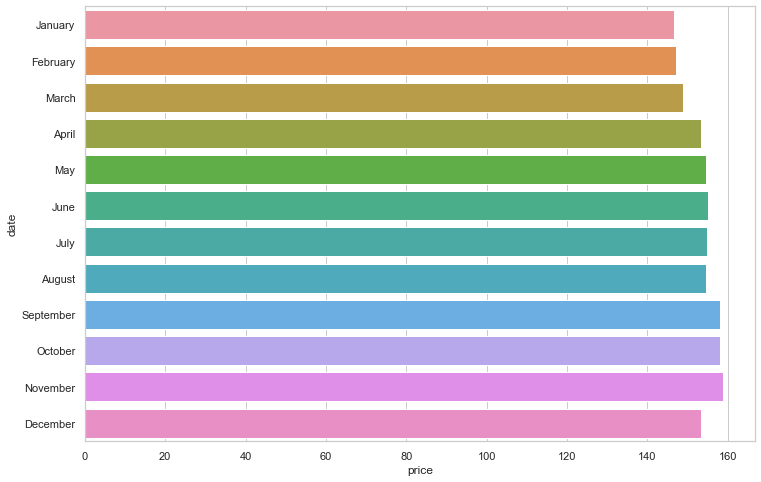

In [113]:
plt.figure(figsize=(12,8))
sns.barplot(y = mean_of_mouth.index, x = mean_of_mouth)

<AxesSubplot:xlabel='date', ylabel='price'>

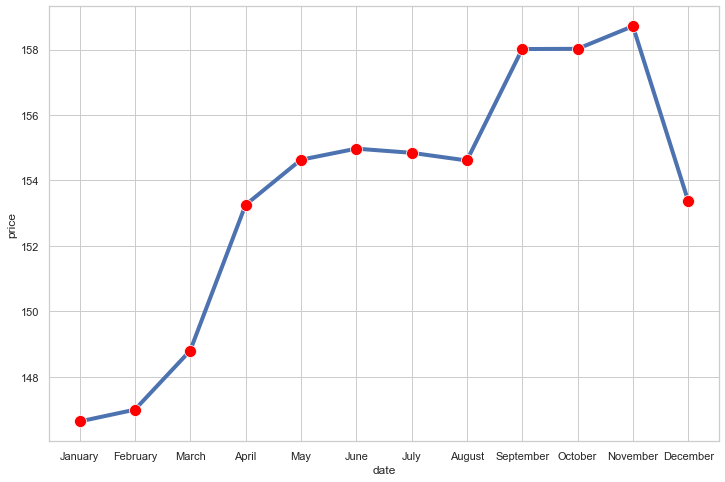

In [130]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.lineplot(y = mean_of_mouth, x = mean_of_mouth.index,linewidth = 4,marker='o', markerfacecolor='red', markersize=12)

November hit the highest price

### Count day price

In [115]:
airbnb_calender['dayofweek'] = airbnb_calender.date.dt.day_name()
airbnb_calender.head()

listing_id       date available  price  adjusted_price  minimum_nights  \
0       63320 2020-12-11         t   45.0            45.0            30.0   
1       30031 2020-12-11         f   49.0            49.0            30.0   
2       30031 2020-12-12         f   49.0            49.0            30.0   
3       30031 2020-12-13         f   49.0            49.0            30.0   
4       30031 2020-12-14         f   49.0            49.0            30.0   

   maximum_nights dayofweek  
0           365.0    Friday  
1            30.0    Friday  
2            30.0  Saturday  
3            30.0    Sunday  
4            30.0    Monday

In [116]:
mean_of_day = airbnb_calender.groupby(airbnb_calender['dayofweek'])['price'].mean()
mean_of_day

dayofweek
Friday       155.709865
Monday       152.517922
Saturday     155.673434
Sunday       152.491748
Thursday     153.125950
Tuesday      152.687343
Wednesday    152.935382
Name: price, dtype: float64

In [117]:
mean_of_day = mean_of_day.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

<AxesSubplot:xlabel='dayofweek', ylabel='price'>

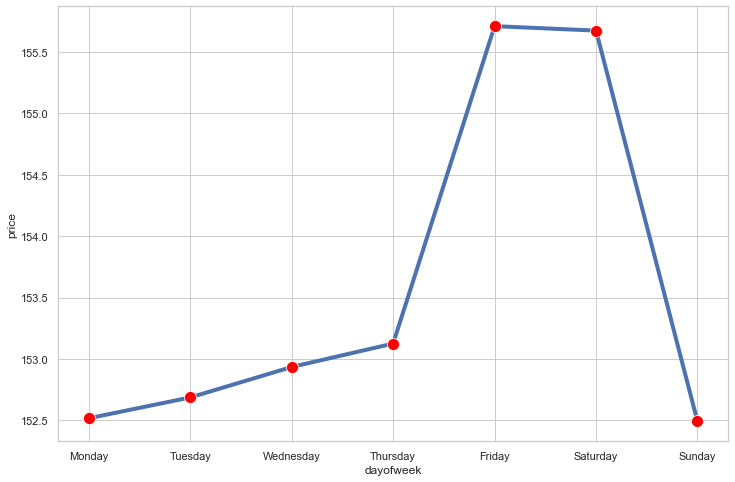

In [131]:
plt.figure(figsize=(12,8))
sns.lineplot(y = mean_of_day, x = mean_of_day.index,linewidth = 4,marker='o', markerfacecolor='red', markersize=12)

In [119]:
mean_of_F_S = (mean_of_day['Friday'] + mean_of_day['Saturday'])/2
mean_of_other = (mean_of_day['Monday'] + mean_of_day['Tuesday']+mean_of_day['Wednesday'] + mean_of_day['Thursday']+mean_of_day['Sunday'])/5
h = (mean_of_F_S-mean_of_other)/mean_of_other
print("mean price at Friday and Saturday:", mean_of_F_S)
print("mean price at other day:", mean_of_other)
print("percentager high:", h)

mean price at Friday and Saturday: 155.69164944039807
mean price at other day: 152.7516687741842
percentager high: 0.019246799002635456


Price increase at Friday and Saturday and about 2% higher than regulay day